In [1]:
from aocutils.grid import dimensions
from aocutils.common import ints
from aocutils.grid import neighbors

f = open("in.txt").read().split("\n")
lava = {ints(line) for line in f}
dimensions(lava)

Dim(min=(1, 0, 0), max=(21, 21, 21), range=(20, 21, 21))

In [2]:
# calculate how many sides are not lave
sides = 0
lava = set(lava)
for l in lava:
    for n in neighbors(l, diag=False):
        if n not in lava:
            sides += 1
sides

4242

In [3]:
# dfs outside of lava
tocheck = [(0, 0, 0)]
seen = set()
sides = 0
n, m = -1, 22  # boundary to not go to infinity
while tocheck:
    for new in neighbors(tocheck.pop()):
        x,y,z = new    
        if n <= x < m and n <= y < m and n <= z < m:
            if new not in seen:
                if new in lava:
                    sides += 1
                else:
                    tocheck.append(new)
                    seen.add(new)
sides

2424

In [5]:
dimensions(lava)

Dim(min=(1, 0, 0), max=(21, 21, 21), range=(20, 21, 21))

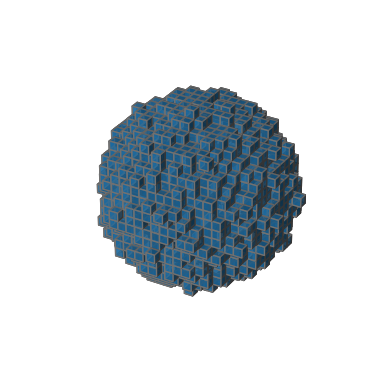

In [31]:
import numpy as np
import matplotlib.pyplot as plt
axes = [22,22,22]  # set bounds

grid = np.zeros(axes, dtype=np.int8)   # Initialise 3d grid to empty
for x,y,z in lava:  # set our array to filled for all filled cubes
    grid[x,y,z] = 1

facecolors = np.where(grid==1, 'red', 'black')

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(grid, facecolors=facecolors, edgecolors="grey", alpha=0.7)
ax.set_aspect('equal')
plt.axis("off")
plt.show()